## Data Processing

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [12, 9]

In [359]:
# loading the file of cpi in Japan  
df = pd.read_excel("./japan_cpi.xlsx")
df

,DATE,CPI
0,1973年 1月,35.7
1,2,36.0
2,3,36.9
3,4,37.6
4,5,38.2
...,...,...
595,8,102.7
596,9,103.1
597,10,103.7
598,11,103.9


In [360]:
# making the date column
dates = []
for year in range(1973, 2023): #from 1973 to 2022
    for month in range(1, 13):
        dates.append(f"{year}-{month:02d}")


# making a new data frame
dependent_df = pd.DataFrame({
    "DATE": dates,
    "CPI": df["CPI"]
})

# converting DATE column to datetime type
dependent_df["DATE"] = pd.to_datetime(dependent_df["DATE"], format="%Y-%m")
# chaning DATE column to show only year and month
dependent_df["DATE"] = dependent_df["DATE"].dt.strftime("%Y-%m")
# converting DATE column to datetime type
dependent_df["DATE"] = pd.to_datetime(dependent_df["DATE"], format="%Y-%m")


# calculating the inflation rate(year-over-year change(%))
dependent_df["Inflation_rate"] = dependent_df["CPI"].pct_change(periods=12)*100

# dropping NaN
dependent_df = dependent_df.dropna()


dependent_df = dependent_df[["DATE", "Inflation_rate"]]

dependent_df.head(24)

,DATE,Inflation_rate
12,1974-01-01,22.128852
13,1974-02-01,25.000000
14,1974-03-01,22.764228
15,1974-04-01,23.404255
16,1974-05-01,21.989529
17,1974-06-01,22.454308
18,1974-07-01,23.834197
19,1974-08-01,24.164524
20,1974-09-01,22.500000
21,1974-10-01,24.626866


In [361]:
dependent_df['DATE'] = pd.to_datetime(dependent_df['DATE'], format='%Y-%m')
dependent_df

,DATE,Inflation_rate
12,1974-01-01,22.128852
13,1974-02-01,25.000000
14,1974-03-01,22.764228
15,1974-04-01,23.404255
16,1974-05-01,21.989529
...,...,...
595,2022-08-01,3.009027
596,2022-09-01,2.997003
597,2022-10-01,3.803804
598,2022-11-01,3.796204


In [362]:
dependent_df.set_index("DATE", inplace=True)

Text(0, 0.5, 'Inflation rate(%)')

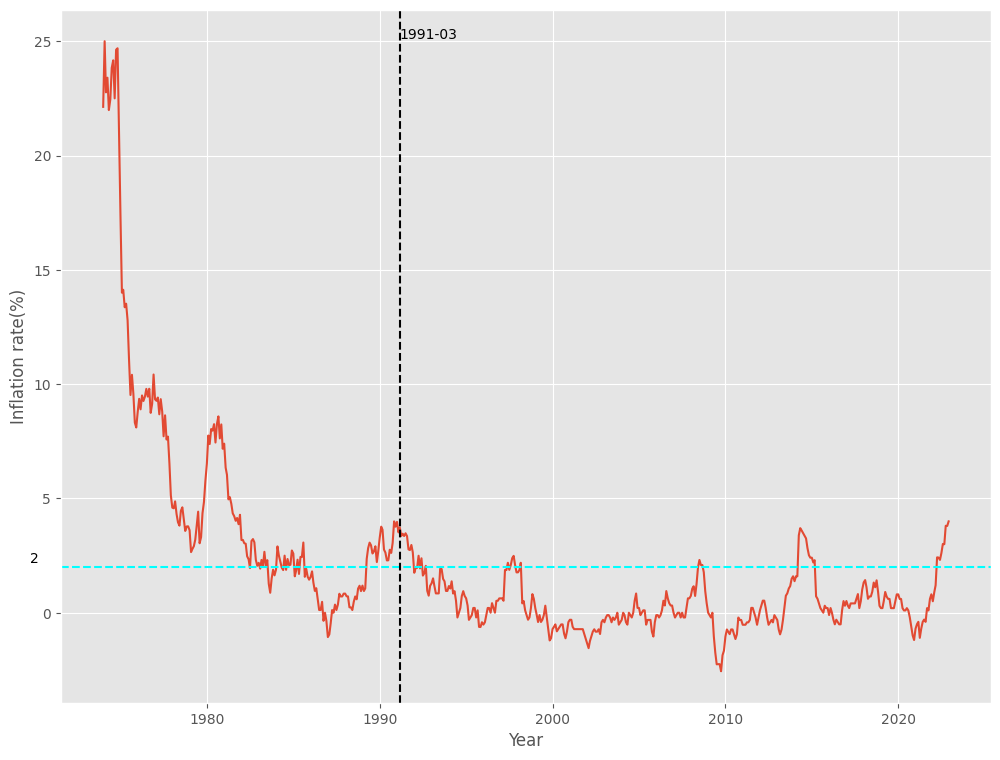

In [363]:
# showing the graph of the inflation rate
plt.plot(dependent_df["Inflation_rate"])

# adjusting the x axis
#year = dependent_df["DATE"].str.slice(0, 4)
#plt.xticks(range(12, len(dependent_df), 54), year[list(range(12, len(dependent_df), 54))])

# showing 2% horizontal line
plt.axhline(y=2, color="cyan", linestyle="--")
plt.text(2, 2.2, "2", ha="center")

# showing 1991-03 vertical line
#plt.axvline(x=206, color="black") #index 206 is 1991-03
#plt.axvline(x=2000, color="black")
plt.axvline(x=pd.Timestamp("1991-03-01"), color="black", linestyle='--')
plt.text(pd.Timestamp("1991-03-01"), max(dependent_df["Inflation_rate"]), '1991-03', 
         color="black", verticalalignment='bottom')

plt.xlabel("Year")
plt.ylabel("Inflation rate(%)")
#plt.title("Inflation rate 1974-2022")

## Analysis

### AR model

In [364]:
# pseudo out of sample 
# train data: 1974.01 - 2020.12
# test data: 2021.01-2022.12
from pmdarima import model_selection

train, test = model_selection.train_test_split(dependent_df, test_size=24)

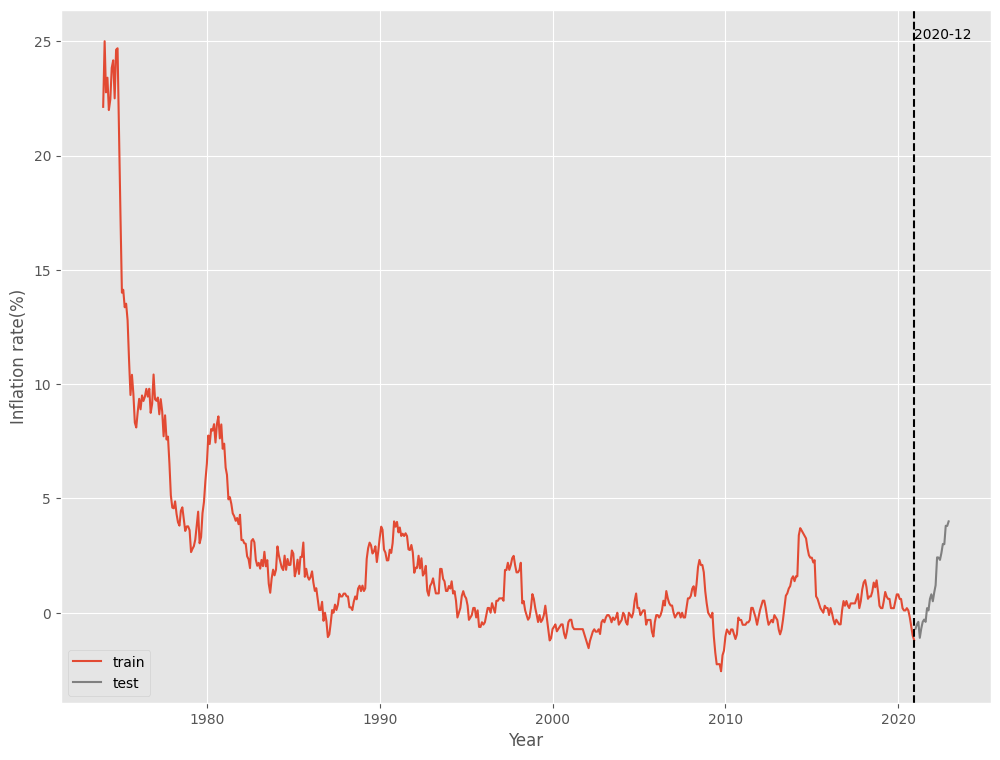

In [365]:
# train data
plt.plot(train["Inflation_rate"], label='train')

# test data
plt.plot(test["Inflation_rate"], label='test', color='gray')

# adjusting the x axis
#year = dependent_df["DATE"].str.slice(0, 4)
#plt.xticks(range(12, len(dependent_df), 54), year[list(range(12, len(dependent_df), 54))])
plt.axvline(x=pd.Timestamp("2020-12-01"), color="black", linestyle='--')
plt.text(pd.Timestamp("2020-12-01"), max(dependent_df["Inflation_rate"]), '2020-12', 
         color="black", verticalalignment='bottom')

# adding labels
plt.xlabel("Year")
plt.ylabel("Inflation rate(%)")
#plt.title("Train and test data of Inflation rate 1974-2022")

plt.legend()
plt.show()

c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Nutzer\AppData\Local\Programs\Python\Python

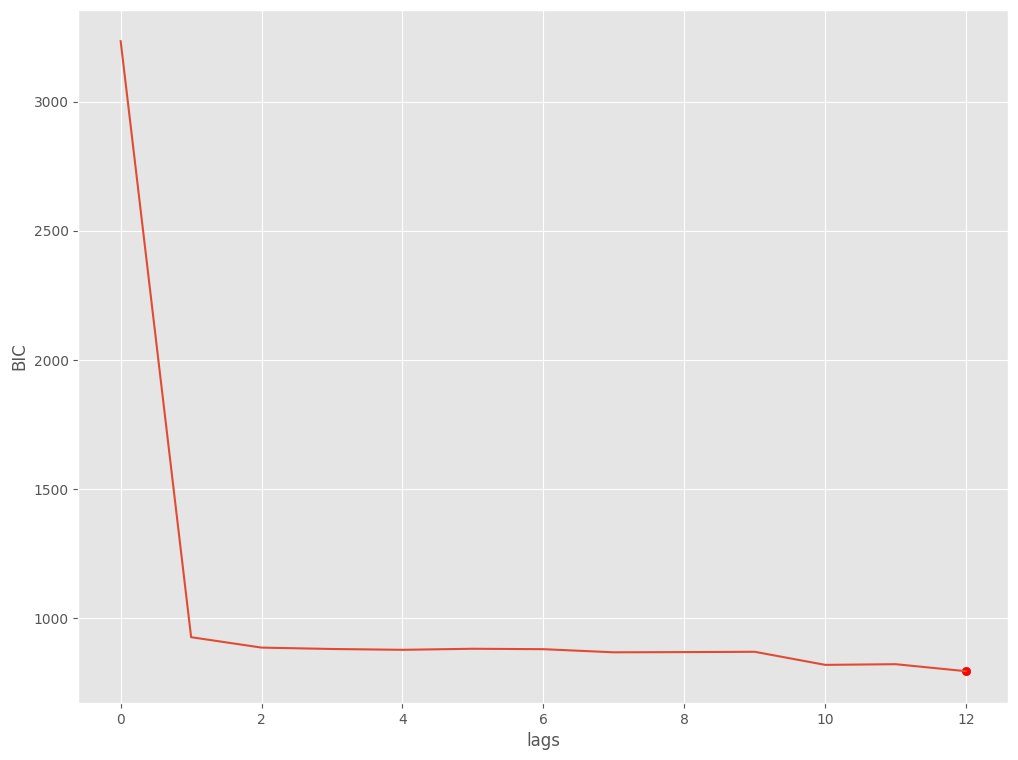

In [366]:
from statsmodels.tsa.ar_model import AutoReg

ar_bic = []

for lag in range(0, 13):
    ar_model = AutoReg(train["Inflation_rate"], lags=lag).fit()
    bic = ar_model.bic
    ar_bic.append(bic)


lags = [lag for lag in range(0, 13)]

plt.plot(lags, ar_bic)
#plt.title("Which lag is the most optimal?")
plt.xlabel("lags")
plt.ylabel("BIC")

# seeking the minimum BIC and the x value
minimum = min(ar_bic)
best_lag = ar_bic.index(minimum) 
# illustrating the point on the graph
plt.scatter(best_lag, minimum, color="red")
#plt.annotate(text="lags: {}, BIC: {:.2f}".format(best_lag, round(minimum, 2)), xy=(best_lag, minimum), xytext=(best_lag+5, minimum+5))

In [367]:
ar_model = AutoReg(train["Inflation_rate"], lags=12).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:         Inflation_rate   No. Observations:                  564
Model:                    AutoReg(12)   Log Likelihood                -352.616
Method:               Conditional MLE   S.D. of innovations              0.458
Date:                Mon, 30 Sep 2024   AIC                            733.231
Time:                        09:46:31   BIC                            793.621
Sample:                    01-01-1975   HQIC                           756.827
                         - 12-01-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0473      0.023      2.092      0.036       0.003       0.092
Inflation_rate.L1      1.0476      0.041     25.353      0.000       0.967       1.129
Inflation_rate.L2   

c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\Nutzer\AppData\Local\Temp\ipykernel_13168\770236277.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predictions.append(next_prediction[0])
c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will co

            Inflation_rate  Predicted_Inflation
DATE                                           
2021-01-01       -0.696517            -1.133804
2021-02-01       -0.498504            -1.044224
2021-03-01       -0.398804            -0.960774
2021-04-01       -1.097804            -0.892778
2021-05-01       -0.699301            -0.825599
2021-06-01       -0.400400            -0.761511
2021-07-01       -0.300000            -0.720982
2021-08-01       -0.399600            -0.689848
2021-09-01        0.200200            -0.650418
2021-10-01        0.100200            -0.588072
2021-11-01        0.603015            -0.504272
2021-12-01        0.805639            -0.412541
2022-01-01        0.501002            -0.325410
2022-02-01        0.901804            -0.244859
2022-03-01        1.201201            -0.169547
2022-04-01        2.421796            -0.098142
2022-05-01        2.414487            -0.030780
2022-06-01        2.311558             0.032935
2022-07-01        2.607823             0

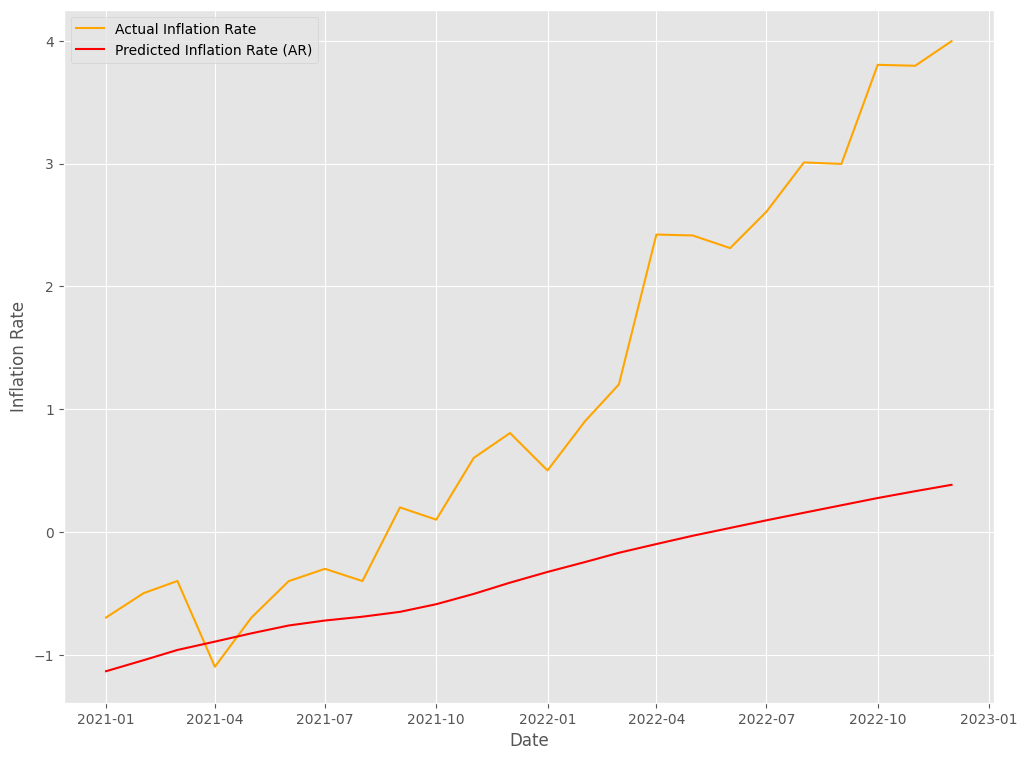

In [368]:
# recursively forecast 

# Initialize an empty list to store predictions
predictions = []

# Get the last observation from the training set to start recursive forecasting
last_observation = train["Inflation_rate"].values[-12:]  # Start with the last 12 observations (lags)

# Recursively forecast the test period (24 steps ahead)
for t in range(len(test)):
    # Predict the next value using the AR model
    next_prediction = ar_model.predict(start=len(train) + t, end=len(train) + t)
    
    # Append the prediction to the list
    predictions.append(next_prediction[0])
    
    # Update the last observation with the new prediction (rolling window for recursive forecast)
    last_observation = np.append(last_observation[1:], next_prediction)

# Convert predictions list into a DataFrame for easier comparison
test["Predicted_Inflation"] = predictions

# Print or plot the results
print(test[["Inflation_rate", "Predicted_Inflation"]])

# Optionally, you can plot the actual vs predicted inflation rates
import matplotlib.pyplot as plt

plt.plot(test.index, test["Inflation_rate"], label='Actual Inflation Rate', color='orange')
plt.plot(test.index, test["Predicted_Inflation"], label='Predicted Inflation Rate (AR)', color='red')
plt.xlabel("Date")
plt.ylabel("Inflation Rate")
plt.legend()
plt.show()


In [369]:
from sklearn.metrics import mean_squared_error

# Calculate the MSE between actual and predicted inflation rates
mse = mean_squared_error(test["Inflation_rate"], test["Predicted_Inflation"])

# Print the MSE value
print(f"Mean Squared Error (MSE) for the test period: {mse}")


Mean Squared Error (MSE) for the test period: 3.592666379440875


### PCR

In [370]:
# loading the independent variables
independent_df = pd.read_excel("./japandata2212v1.xlsx", index_col=0)
independent_df.index.name = "DATE"
independent_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219
DATE,,,,,,,,,,,,,,,,,,,,,
1974.01,0.559746,0.901944,0.238201,-0.584123,-0.709110,-1.166771,-1.779003,-0.468975,1.380619,1.104739,...,29.396250,-9.376316,11.904254,15.808955,12.561179,-2.080186,-2.922662,0.084211,7.705495,6.180310
1974.02,-0.152220,-0.153254,-0.714046,-0.589233,-1.164106,2.121954,0.015022,1.562274,-2.599161,3.321028,...,28.329910,2.580275,13.899387,19.553799,14.564708,9.436842,2.223252,8.624316,5.865725,-1.017772
1974.03,-1.972964,-2.303765,-1.144644,-0.562199,-3.208738,-4.667215,-2.162582,-4.017054,-0.462617,-1.716276,...,25.601181,2.725965,13.244087,19.917441,15.198214,-1.452607,4.032623,-0.852053,1.297910,-1.612140
1974.04,-2.148760,-1.999210,0.813929,0.737971,-4.286417,-4.443463,-0.992528,-4.891304,-2.603769,2.034056,...,22.720102,3.081807,16.333070,21.794721,16.082008,0.201007,1.611498,0.351562,7.989180,-1.174872
1974.05,0.164296,0.167194,8.965116,-1.352986,-3.585815,-2.402487,1.758829,6.931126,2.957780,1.148239,...,23.059430,2.884694,16.200241,20.423424,17.053753,1.272691,9.087012,0.428182,11.038353,-0.039761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.08,3.405573,3.512397,1.212121,3.353293,4.072883,1.340782,2.388797,0.294406,-0.954401,-4.050145,...,1.529052,-0.701403,0.533049,1.647287,1.285856,0.057392,-2.137823,4.579112,-1.049437,-1.017346
2022.09,-1.696607,-1.896208,-4.550898,0.811124,-1.338826,-0.110254,-0.724055,1.272016,-10.278373,8.844221,...,1.868240,-0.501505,0.641711,2.165354,1.185771,-3.097396,0.450277,-4.973173,2.943743,5.841467
2022.10,-3.248731,-3.051882,3.513174,-1.494253,0.626305,-1.986755,-3.403566,1.352657,4.534606,-3.324100,...,2.554028,0.201207,2.058505,0.881489,0.785855,0.722150,-3.048290,-0.289338,1.368922,2.703647


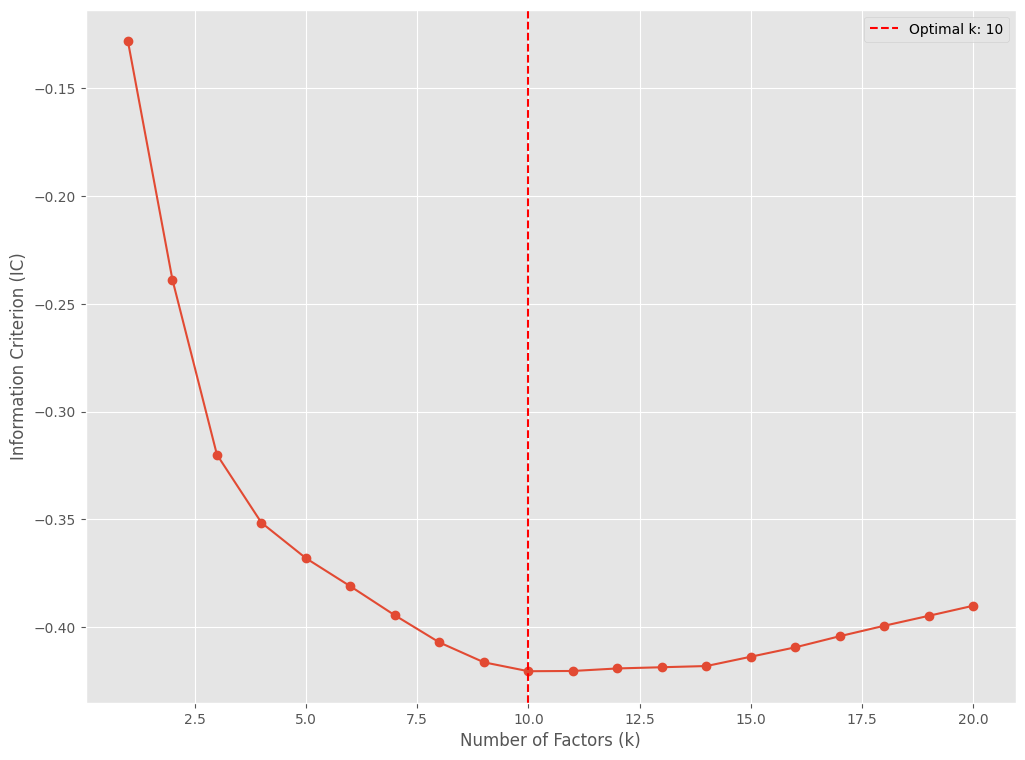

optimal number of the factors: 10


In [371]:
from sklearn.decomposition import PCA

# standardizing the data
X_standardized = (independent_df - independent_df.mean()) / independent_df.std()

# setting the parameters
N, T = X_standardized.shape
# the maximum number of the principal component
max_k = 20 

# information criterion (IC)
def calculate_ic(X, k, N, T):
    pca = PCA(n_components=k)
    pca.fit(X)
    F = pca.transform(X)
    Lambda = pca.components_.T
    V_k = np.sum((X - F @ Lambda.T) ** 2) / (N * T)
    IC_k = np.log(V_k) + k * (N + T) / (N * T) * np.log(N * T / (N + T))
    return IC_k

# calculating the IC, and selecting the number of factors that minimized the IC
ic_values = [calculate_ic(X_standardized.values, k, N, T) for k in range(1, max_k + 1)]
optimal_k = np.argmin(ic_values) + 1

# showing the result
plt.plot(range(1, max_k + 1), ic_values, marker='o')
plt.xlabel('Number of Factors (k)')
plt.ylabel('Information Criterion (IC)')
#plt.title('IC for Different Numbers of Factors')
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k: {optimal_k}')
plt.legend()
plt.show()

print(f"optimal number of the factors: {optimal_k}")

In [372]:
# pca

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# standardized
scaler = StandardScaler()
scaled_data = scaler.fit_transform(independent_df)

# conducting a principal component analysis
pca = PCA(n_components=optimal_k)
principal_component = pca.fit_transform(scaled_data)

# making a data frame of principal components
pca_df = pd.DataFrame(data=principal_component)
pca_df

,0,1,2,3,4,5,6,7,8,9
0,11.120137,23.439514,3.105954,-2.959263,1.374058,-7.487780,5.142771,6.989615,6.986918,-4.420478
1,14.776673,24.012929,-3.762988,-11.015807,1.773227,0.200252,0.921396,-4.945615,-0.325487,-6.689224
2,21.700072,20.631548,0.074144,-11.550371,0.465169,-3.288950,3.058330,-3.478782,1.738282,-0.296470
3,18.217303,22.112562,-1.559832,-9.203414,4.143943,2.152254,2.625727,1.138350,-1.520507,-1.119949
4,9.014425,23.705719,-2.246440,-2.995889,-2.431169,5.461505,4.593619,-1.366825,1.562822,-0.223097
...,...,...,...,...,...,...,...,...,...,...
583,-5.488571,6.001641,-2.757013,-2.524079,-0.334721,3.722491,4.013435,5.327277,-2.131125,-1.458440
584,7.197308,2.641498,1.743000,-8.535512,-1.158896,0.623617,0.673997,-2.188569,0.748664,-0.792394
585,3.179316,1.520124,1.417348,1.884423,-3.361814,0.054517,8.002934,-0.072758,2.049848,-1.115783
586,2.072617,2.703591,-0.654621,-3.402045,1.070074,-0.028716,2.848332,0.387525,0.822691,-0.895750


In [373]:
# adding DATE column and setting it as a index
pca_df.index = dependent_df.index

In [374]:
# adding the inflation rate to pca data frame
pca_df["Inflation_rate"] = dependent_df["Inflation_rate"]

In [375]:
# spliting the data into train and test period

train, test = model_selection.train_test_split(pca_df, test_size=24)

# train data
pca_y_train = train["Inflation_rate"]
pca_X_train = train.drop("Inflation_rate", axis=1)

# test data
pca_y_test = test["Inflation_rate"]
pca_X_test = test.drop("Inflation_rate", axis=1)

In [376]:
# regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#X = pca_df
#y = dependent_df["Inflation_rate"]

# forecast
pcr_model = LinearRegression().fit(pca_X_train, pca_y_train)



In [377]:
# forecasting
train_pred = pcr_model.predict(pca_X_train)

test_pred = pcr_model.predict(pca_X_test)


In [378]:
all_forecast = np.concatenate((train_pred, test_pred))
all_forecast.tolist()

[22.77858209106012,
 23.952691012623724,
 22.44382522119495,
 22.530420187397585,
 21.944973299127593,
 23.110651239140093,
 23.997535798439834,
 22.81954818322288,
 21.399813139954745,
 22.26648700765091,
 21.554150156131886,
 19.387528287724326,
 15.777837077230789,
 14.090537697113334,
 13.583560331659058,
 11.905266953410116,
 12.9126825193532,
 11.046826948195935,
 9.763994628007964,
 8.344721482283889,
 8.556347241156889,
 8.66576106243461,
 7.331232552965532,
 7.022533375512409,
 6.738094599154285,
 7.793154150974885,
 7.895380051661162,
 7.7325830075371,
 7.832135583762948,
 8.046935770114988,
 8.825519192805007,
 8.960724184304336,
 9.06388427718939,
 8.613930569250186,
 8.983372210594169,
 9.881282057075762,
 7.6782257156888605,
 7.7472529661326455,
 8.19308291482632,
 7.812120806083733,
 8.590615193778566,
 7.882322318145714,
 7.520686682885225,
 6.773139343961938,
 5.971609146888326,
 5.659917395262267,
 5.854873509610504,
 5.655126528029607,
 4.493694042803883,
 4.44219254

In [379]:
# making a dataframe that has a column of forecast value
pcr_forecast_result = pd.DataFrame({
    "forecasts":all_forecast
})

pcr_forecast_result.index = pca_df.index

In [380]:
# evaluation

# Calculate the MSE between actual and predicted inflation rates
mse = mean_squared_error(test["Inflation_rate"], test_pred)

# Print the MSE value
print(f"Mean Squared Error (MSE) for the test period: {mse}")

Mean Squared Error (MSE) for the test period: 3.4329990089268683


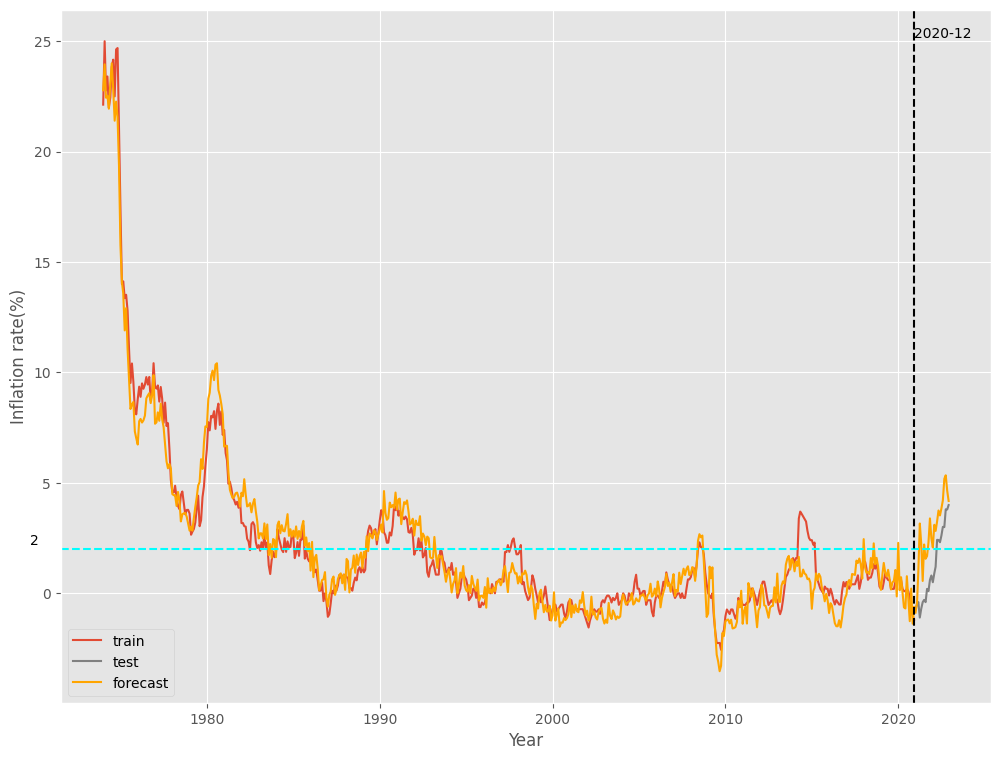

In [381]:
# showing the forecasts
  
# train data
plt.plot(train["Inflation_rate"], label='train')

# test data
plt.plot(test["Inflation_rate"], label='test', color='gray')


# forecast
#plt.plot(train_pred, label="forecast", color="orange")
#plt.plot(test_pred, label="forecast", color="orange")
plt.plot(pcr_forecast_result[:564], label="forecast", color="orange")
plt.plot(pcr_forecast_result[564:], color="orange")


# adjusting the x axis
#year = dependent_df["DATE"].str.slice(0, 4)
#plt.xticks(range(12, len(dependent_df), 54), year[list(range(12, len(dependent_df), 54))])

# showing 2% horizontal line
#plt.axhline(y=2, color="red")
plt.axhline(y=2, color="cyan", linestyle="--")
plt.text(2, 2.2, "2", ha="center")

#plt.axvline(x=564, color="blue")
plt.axvline(x=pd.Timestamp("2020-12-01"), color="black", linestyle='--')
plt.text(pd.Timestamp("2020-12-01"), max(dependent_df["Inflation_rate"]), '2020-12', 
         color="black", verticalalignment='bottom')

# adding labels
plt.xlabel("Year")
plt.ylabel("Inflation rate(%)")
#plt.title("Forecast by Principal component regression model")

plt.legend()
plt.show()

### FAAR

In [382]:
# pca

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# standardized
scaler = StandardScaler()
scaled_data = scaler.fit_transform(independent_df)

# conducting a principal component analysis
pca = PCA(n_components=optimal_k)
principal_component = pca.fit_transform(scaled_data)

# making a data frame of principal components
pca_df = pd.DataFrame(data=principal_component)

# chaging the index 
pca_df.index = dependent_df.index

In [383]:
inflation_pca_df = pd.concat([dependent_df, pca_df], axis=1)
inflation_pca_df

,Inflation_rate,0,1,2,3,4,5,6,7,8,9
DATE,,,,,,,,,,,
1974-01-01,22.128852,11.120137,23.439513,3.105953,-2.959242,1.375004,-7.489655,5.139499,6.978071,7.026794,-4.270527
1974-02-01,25.000000,14.776673,24.012929,-3.762988,-11.015589,1.773467,0.199919,0.931786,-4.935852,-0.337109,-6.703404
1974-03-01,22.764228,21.700072,20.631548,0.074144,-11.550420,0.465250,-3.284277,3.062367,-3.477806,1.728610,-0.342306
1974-04-01,23.404255,18.217303,22.112563,-1.559832,-9.203108,4.144764,2.147095,2.629180,1.152314,-1.546836,-1.167798
1974-05-01,21.989529,9.014425,23.705719,-2.246438,-2.996181,-2.431271,5.466807,4.587932,-1.381100,1.578991,-0.187316
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3.009027,-5.488571,6.001641,-2.757013,-2.524180,-0.334973,3.722102,4.010705,5.327958,-2.136502,-1.491939
2022-09-01,2.997003,7.197308,2.641498,1.743002,-8.535703,-1.159533,0.624335,0.668338,-2.193684,0.756968,-0.815622
2022-10-01,3.803804,3.179316,1.520124,1.417347,1.884388,-3.361868,0.052339,7.999050,-0.074472,2.059225,-1.059184


c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Nutzer\AppData\Local\Programs\Python\Python

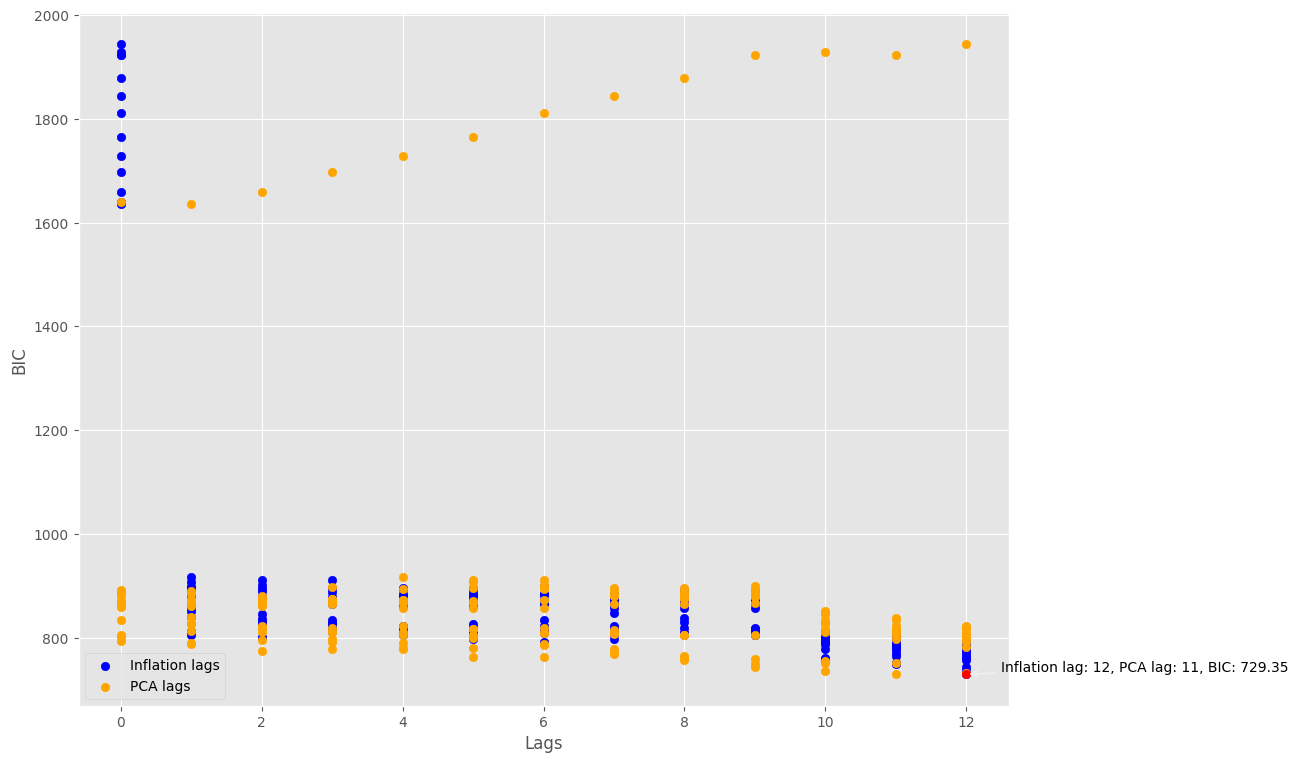

最適なラグ - インフレ率: 12, 主成分: 11, 最小BIC: 729.3500147908617


In [384]:
# exploring different combinations of lags for the AR model part and the factor part for the FAAR model
BIC = []

# up to 12 lags for inflation rate 
for lag_inflation in range(0, 13):
    for lag_pca in range(0, 13):
        # Apply the same lag to all principal components
        lagged_pca_df = pca_df.shift(lag_pca)
        # Lag in inflation rate
        lagged_inflation = inflation_pca_df["Inflation_rate"].shift(lag_inflation)
        
        # Adjust the lag of the inflation rate and the lag of the principal components to the same length and remove missing values
        merged_df = pd.concat([lagged_inflation, lagged_pca_df], axis=1).dropna()
        y_train_adjusted = merged_df.iloc[:, 0]  # adjusted inflation rate
        X_train_adjusted = merged_df.iloc[:, 1:]  # adjusted principal components

        try:
            # AutoReg model
            ar_model = AutoReg(y_train_adjusted, exog=X_train_adjusted, lags=lag_inflation).fit()
            BIC.append((lag_inflation, lag_pca, ar_model.bic))
        except:
            continue

# finding the minimum value of BIC
min_bic = min(BIC, key=lambda x: x[2])  

# making the list of lags
lags_inflation = [x[0] for x in BIC]
lags_pca = [x[1] for x in BIC]
bic_values = [x[2] for x in BIC]

# showing the result by the graph
plt.scatter(lags_inflation, bic_values, label="Inflation lags", color='blue')
plt.scatter(lags_pca, bic_values, label="PCA lags", color='orange')

#plt.title("Optimal lags for Inflation and PCA using BIC")
plt.xlabel("Lags")
plt.ylabel("BIC")
plt.legend()

# highlight lags minimum BIC
best_inflation_lag, best_pca_lag, min_bic_value = min_bic
plt.scatter(best_inflation_lag, min_bic_value, color="red")
plt.annotate(text=f"Inflation lag: {best_inflation_lag}, PCA lag: {best_pca_lag}, BIC: {min_bic_value:.2f}", 
             xy=(best_inflation_lag, min_bic_value), 
             xytext=(best_inflation_lag+0.5, min_bic_value+5),
             arrowprops=dict(arrowstyle="->", lw=1.5))

plt.show()

print(f"optimal lag length - inflation rate: {best_inflation_lag}, principal components: {best_pca_lag}, minimum BIC: {min_bic_value}")

In [385]:
inflation_pca_df["lagged_inflation_rate"] = inflation_pca_df["Inflation_rate"].shift(12)

for i in range(0, 10):
    inflation_pca_df[f"lagged_{i}"] = inflation_pca_df[i].shift(11)
inflation_pca_df = inflation_pca_df.dropna()
inflation_pca_df.columns = inflation_pca_df.columns.astype(str)
inflation_pca_df

,Inflation_rate,0,1,2,3,4,5,6,7,8,...,lagged_0,lagged_1,lagged_2,lagged_3,lagged_4,lagged_5,lagged_6,lagged_7,lagged_8,lagged_9
DATE,,,,,,,,,,,,,,,,,,,,,
1975-01-01,17.431193,17.004778,10.715790,3.188484,6.253390,0.931399,-7.204449,-2.932350,5.156996,7.008417,...,14.776673,24.012929,-3.762988,-11.015589,1.773467,0.199919,0.931786,-4.935852,-0.337109,-6.703404
1975-02-01,14.000000,5.804855,11.155933,-7.475700,11.193656,1.275650,5.820989,0.189863,-1.978003,0.465475,...,21.700072,20.631548,0.074144,-11.550420,0.465250,-3.284277,3.062367,-3.477806,1.728610,-0.342306
1975-03-01,14.128035,4.184739,11.436865,-2.751039,10.768670,-0.903193,2.523656,-1.890395,-2.628188,-0.333406,...,18.217303,22.112563,-1.559832,-9.203108,4.144764,2.147095,2.629180,1.152314,-1.546836,-1.167798
1975-04-01,13.362069,-7.360717,13.040225,-0.648282,12.993915,-0.858718,-5.146577,2.972018,0.271793,-3.541903,...,9.014425,23.705719,-2.246438,-2.996181,-2.431271,5.466807,4.587932,-1.381100,1.578991,-0.187316
1975-05-01,13.519313,5.778264,9.760755,-1.952200,3.695007,4.793855,0.243191,-3.513653,-4.414470,2.243381,...,19.946363,20.478621,-0.240415,-1.574463,-0.808758,4.305133,6.235752,-1.322462,1.251248,1.610924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3.009027,-5.488571,6.001641,-2.757013,-2.524180,-0.334973,3.722102,4.010705,5.327958,-2.136502,...,12.686320,-3.566718,-6.610399,-5.672153,-3.845138,3.846733,-2.697853,3.787045,-6.673060,-4.588230
2022-09-01,2.997003,7.197308,2.641498,1.743002,-8.535703,-1.159533,0.624335,0.668338,-2.193684,0.756968,...,-5.507661,2.563437,6.340741,-0.875160,0.509791,4.294956,7.544841,1.036784,4.414874,5.058426
2022-10-01,3.803804,3.179316,1.520124,1.417347,1.884388,-3.361868,0.052339,7.999050,-0.074472,2.059225,...,-9.451416,5.557830,5.862675,-6.935388,0.607014,-2.444096,6.622776,-4.801320,4.894882,2.294651


In [386]:
# split the data into train and test data 
train, test = model_selection.train_test_split(inflation_pca_df, test_size=24)

y_train = train["Inflation_rate"]
X_train = train.drop("Inflation_rate", axis=1)

y_test = test["Inflation_rate"]
X_test = test.drop("Inflation_rate", axis=1)

In [387]:
faar_model = LinearRegression().fit(X_train, y_train)

In [388]:
train_pred = faar_model.predict(X_train)
train_pred = pd.Series(train_pred, index=y_train.index)

In [389]:
# recursivly forecast

# copy of the train data 
y_train_new = y_train.copy()

# forecasting is performed while updating the explanatory variable X
for i in range(len(y_test)):
    
    # forecast of the current period
    X_value =  X_test.iloc[i:(i+1),:]
    y_value_pred = faar_model.predict(X_value)
    y_value_pred = pd.Series(y_value_pred,index=[X_value.index[0]])
    y_train_new = pd.concat([y_train_new,y_value_pred])
    
    X_test.iloc[(i+1):(i+2),11] = y_train_new.iloc[-12]

test_pred = y_train_new[-24:]


In [390]:
# evaluation

# Calculate the MSE between actual and predicted inflation rates
mse = mean_squared_error(y_test, test_pred)

# Print the MSE value
print(f"Mean Squared Error (MSE) for the test period: {mse}")

Mean Squared Error (MSE) for the test period: 2.4378127988052203


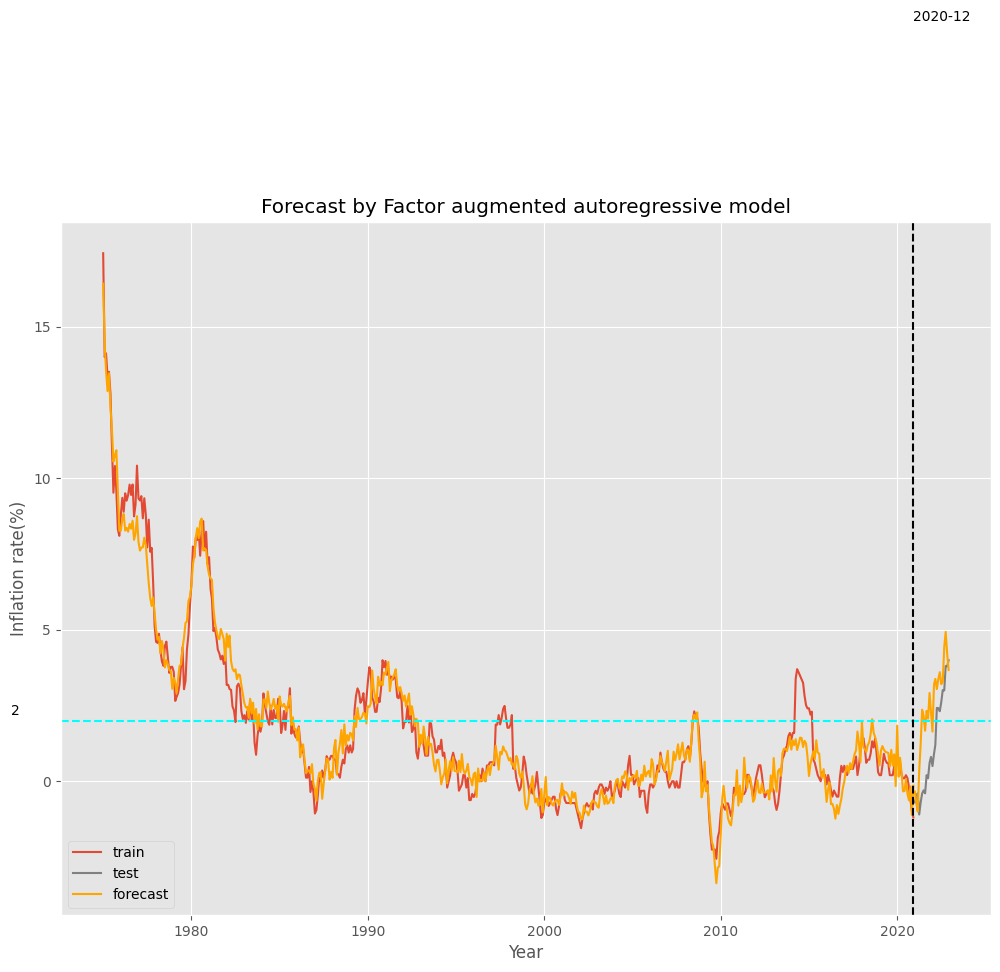

In [391]:
# showing the forecasts
  
# train data
plt.plot(train["Inflation_rate"], label='train')

# test data
plt.plot(test["Inflation_rate"], label='test', color='gray')


# forecast
#plt.plot(train_pred, label="forecast", color="orange")
#plt.plot(test_pred, label="forecast", color="orange")
#plt.plot(pcr_forecast_result[:564], label="forecast", color="orange")
#plt.plot(pcr_forecast_result[564:], color="orange")
plt.plot(train_pred, color="orange")
plt.plot(test_pred, label="forecast", color="orange")

# adjusting the x axis
#year = dependent_df["DATE"].str.slice(0, 4)
#plt.xticks(range(12, len(dependent_df), 54), year[list(range(12, len(dependent_df), 54))])

# showing 2% horizontal line
#plt.axhline(y=2, color="red")
plt.axhline(y=2, color="cyan", linestyle="--")
plt.text(2, 2.2, "2", ha="center")

#plt.axvline(x=564, color="blue")
plt.axvline(x=pd.Timestamp("2020-12-01"), color="black", linestyle='--')
plt.text(pd.Timestamp("2020-12-01"), max(dependent_df["Inflation_rate"]), '2020-12', 
         color="black", verticalalignment='bottom')

# adding labels
plt.xlabel("Year")
plt.ylabel("Inflation rate(%)")
plt.title("Forecast by Factor augmented autoregressive model")

plt.legend()
plt.show()

Forecast until 12.2024

In [392]:
inflation_pca_df

,Inflation_rate,0,1,2,3,4,5,6,7,8,...,lagged_0,lagged_1,lagged_2,lagged_3,lagged_4,lagged_5,lagged_6,lagged_7,lagged_8,lagged_9
DATE,,,,,,,,,,,,,,,,,,,,,
1975-01-01,17.431193,17.004778,10.715790,3.188484,6.253390,0.931399,-7.204449,-2.932350,5.156996,7.008417,...,14.776673,24.012929,-3.762988,-11.015589,1.773467,0.199919,0.931786,-4.935852,-0.337109,-6.703404
1975-02-01,14.000000,5.804855,11.155933,-7.475700,11.193656,1.275650,5.820989,0.189863,-1.978003,0.465475,...,21.700072,20.631548,0.074144,-11.550420,0.465250,-3.284277,3.062367,-3.477806,1.728610,-0.342306
1975-03-01,14.128035,4.184739,11.436865,-2.751039,10.768670,-0.903193,2.523656,-1.890395,-2.628188,-0.333406,...,18.217303,22.112563,-1.559832,-9.203108,4.144764,2.147095,2.629180,1.152314,-1.546836,-1.167798
1975-04-01,13.362069,-7.360717,13.040225,-0.648282,12.993915,-0.858718,-5.146577,2.972018,0.271793,-3.541903,...,9.014425,23.705719,-2.246438,-2.996181,-2.431271,5.466807,4.587932,-1.381100,1.578991,-0.187316
1975-05-01,13.519313,5.778264,9.760755,-1.952200,3.695007,4.793855,0.243191,-3.513653,-4.414470,2.243381,...,19.946363,20.478621,-0.240415,-1.574463,-0.808758,4.305133,6.235752,-1.322462,1.251248,1.610924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3.009027,-5.488571,6.001641,-2.757013,-2.524180,-0.334973,3.722102,4.010705,5.327958,-2.136502,...,12.686320,-3.566718,-6.610399,-5.672153,-3.845138,3.846733,-2.697853,3.787045,-6.673060,-4.588230
2022-09-01,2.997003,7.197308,2.641498,1.743002,-8.535703,-1.159533,0.624335,0.668338,-2.193684,0.756968,...,-5.507661,2.563437,6.340741,-0.875160,0.509791,4.294956,7.544841,1.036784,4.414874,5.058426
2022-10-01,3.803804,3.179316,1.520124,1.417347,1.884388,-3.361868,0.052339,7.999050,-0.074472,2.059225,...,-9.451416,5.557830,5.862675,-6.935388,0.607014,-2.444096,6.622776,-4.801320,4.894882,2.294651


In [393]:
y_variable = inflation_pca_df["Inflation_rate"]
X_variable = inflation_pca_df.drop("Inflation_rate", axis=1)

In [394]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(X_variable)

# Convert data to 3 dimensions to pass to LSTM
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, :])
    return np.array(X), np.array(y)

time_steps = 24  # Forecast the next period using the past 24 periods
X, y = create_dataset(scaled_data, time_steps)

# splint the into train and test data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# construct LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(X_train.shape[2]))  

model.compile(optimizer='adam', loss='mean_squared_error')

# training the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Prediction using test data
predicted_values = model.predict(X_test)

# Restore forecast results to original scale
predicted_values_rescaled = scaler.inverse_transform(predicted_values)

# Provide forecasts up to 24 periods in advance.
last_sequence = X_test[-1]  # Use the last sequence of test data
predictions = []
for i in range(24):
    pred = model.predict(last_sequence.reshape(1, time_steps, X_test.shape[2]))
    predictions.append(pred[0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0)

# Restore forecast results to original scale
predictions_rescaled = scaler.inverse_transform(np.array(predictions))

print(predictions_rescaled)

Epoch 1/50


c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1139
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0163
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0132
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0125
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0120
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0114
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0121
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0111
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0105
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0116
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107
Epoch 16/50
14/14 ━━

In [395]:
predicted_X = pd.DataFrame(predictions_rescaled)

monthly_dates = pd.date_range(start='2023-01-01', end='2024-12-01', freq='MS')
predicted_X.index = monthly_dates

predicted_X.columns = X_variable.columns

until_2024_X = pd.concat([X_variable, predicted_X])
until_2024_X


,0,1,2,3,4,5,6,7,8,9,...,lagged_0,lagged_1,lagged_2,lagged_3,lagged_4,lagged_5,lagged_6,lagged_7,lagged_8,lagged_9
1975-01-01,17.004778,10.715790,3.188484,6.253390,0.931399,-7.204449,-2.932350,5.156996,7.008417,-1.211688,...,14.776673,24.012929,-3.762988,-11.015589,1.773467,0.199919,0.931786,-4.935852,-0.337109,-6.703404
1975-02-01,5.804855,11.155933,-7.475700,11.193656,1.275650,5.820989,0.189863,-1.978003,0.465475,0.432458,...,21.700072,20.631548,0.074144,-11.550420,0.465250,-3.284277,3.062367,-3.477806,1.728610,-0.342306
1975-03-01,4.184739,11.436865,-2.751039,10.768670,-0.903193,2.523656,-1.890395,-2.628188,-0.333406,-0.248354,...,18.217303,22.112563,-1.559832,-9.203108,4.144764,2.147095,2.629180,1.152314,-1.546836,-1.167798
1975-04-01,-7.360717,13.040225,-0.648282,12.993915,-0.858718,-5.146577,2.972018,0.271793,-3.541903,-1.826407,...,9.014425,23.705719,-2.246438,-2.996181,-2.431271,5.466807,4.587932,-1.381100,1.578991,-0.187316
1975-05-01,5.778264,9.760755,-1.952200,3.695007,4.793855,0.243191,-3.513653,-4.414470,2.243381,-3.732778,...,19.946363,20.478621,-0.240415,-1.574463,-0.808758,4.305133,6.235752,-1.322462,1.251248,1.610924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,-1.262591,-3.009738,0.857825,-0.110232,0.969343,0.259626,1.492868,-0.080209,0.559879,-0.490230,...,1.326440,-1.781054,0.633686,-1.703128,0.850224,0.823505,1.878376,0.592316,0.238585,-0.199983
2024-09-01,-1.360153,-3.008834,0.844175,-0.124562,0.871833,0.258286,1.449610,-0.102907,0.506469,-0.488368,...,1.218148,-1.928120,0.614190,-1.508426,1.005967,0.789262,1.845074,0.492844,0.279771,-0.234142
2024-10-01,-1.419454,-2.977592,0.823499,-0.127887,0.739466,0.260656,1.395606,-0.128618,0.424303,-0.499568,...,1.018893,-2.092741,0.601192,-1.200873,1.251762,0.720533,1.811821,0.333952,0.365741,-0.324642
2024-11-01,-1.448585,-3.013740,0.814164,-0.171232,0.637744,0.261597,1.370683,-0.132975,0.380522,-0.494464,...,0.867248,-2.262873,0.584961,-1.055774,1.359852,0.696212,1.797410,0.222757,0.394605,-0.379917


In [396]:
faar_model_forecast = LinearRegression().fit(X_variable, y_variable)

In [397]:
# forecast until 2022
forecast_until2022 = faar_model_forecast.predict(X_variable)


In [398]:
# forecast after 2022

# copy of the train data 
y_train_new = y_variable.copy()

# Forecasting is performed while updating the explanatory variable X
for i in range(0, 24):
    
    # forecast the current period
    X_value =  predicted_X.iloc[i:(i+1),:]
    y_value_pred = faar_model.predict(X_value)
    y_value_pred = pd.Series(y_value_pred,index=[X_value.index[0]])
    y_train_new = pd.concat([y_train_new,y_value_pred])
    
    predicted_X.iloc[(i+1):(i+2),11] = y_train_new.iloc[-12]

test_pred = y_train_new[-24:]

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_13168\275670210.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9018036072144353' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  predicted_X.iloc[(i+1):(i+2),11] = y_train_new.iloc[-12]


In [399]:
# making a dataframe that has a full forecast value
forecast_until2022_list = forecast_until2022.tolist()
forecast_until2022_df = pd.DataFrame(forecast_until2022_list)
forecast_until2022_df.index = y_variable.index


all_forecast = pd.concat([forecast_until2022_df, test_pred])

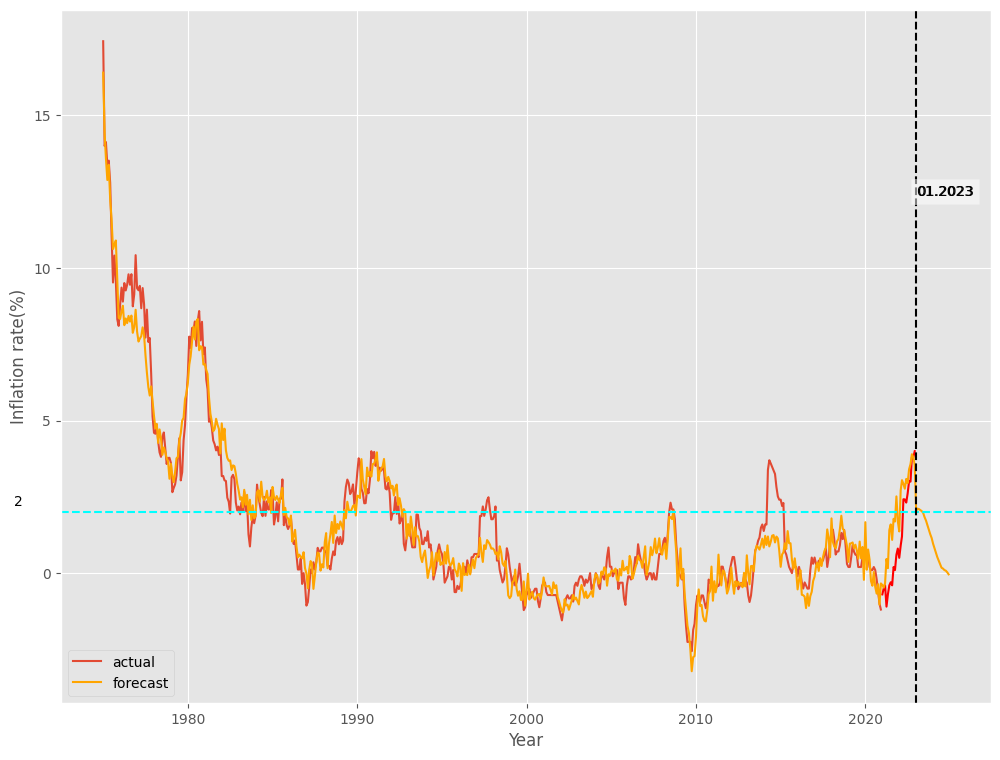

In [400]:
# showing the forecasts
  
# train data
#plt.plot(train["Inflation_rate"], label='train')
plt.plot(train["Inflation_rate"], label='actual')

# test data
#plt.plot(test["Inflation_rate"], label='test', color='red')
plt.plot(test["Inflation_rate"], color='red')


# forecast
#plt.plot(train_pred, label="forecast", color="orange")
#plt.plot(test_pred, label="forecast", color="orange")
#plt.plot(pcr_forecast_result[:564], label="forecast", color="orange")
#plt.plot(pcr_forecast_result[564:], color="orange")
#plt.plot(train_pred, label="forecast", color="orange")
#plt.plot(test_pred, label="forecast", color="orange")
plt.plot(all_forecast, label="forecast", color="orange")


# adjusting the x axis
#year = dependent_df["DATE"].str.slice(0, 4)
#plt.xticks(range(12, len(dependent_df), 54), year[list(range(12, len(dependent_df), 54))])

# showing 2% horizontal line
#plt.axhline(y=2, color="red")
plt.axhline(y=2, color="cyan", linestyle="--")
plt.text(2, 2.2, "2", ha="center")

#plt.axvline(x=564, color="blue")
#plt.axvline(x=pd.Timestamp("2020-12-01"), color="black", linestyle='--')
#plt.text(pd.Timestamp("2020-12-01"), max(dependent_df["Inflation_rate"]), '2020-12', 
        # color="black", verticalalignment='bottom')

# Add a vertical line at January 2023
plt.axvline(x=pd.Timestamp("2023-01-01"), color="black", linestyle='--')

# Method 1: Using offset for the text, placed exactly to the right of the line
plt.text(pd.Timestamp("2023-01-01"), dependent_df["Inflation_rate"].max() * 0.5, 
         '01.2023', color="black", verticalalignment='center', horizontalalignment='left',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Method 2: Adding a small horizontal offset to move the text slightly away from the vertical line
plt.text(pd.Timestamp("2023-01-01") + pd.DateOffset(months=1), 
         dependent_df["Inflation_rate"].max() * 0.5, '01.2023', color="black", 
         verticalalignment='center', horizontalalignment='left')



# adding labels
plt.xlabel("Year")
plt.ylabel("Inflation rate(%)")
#plt.title("Forecast by Factor augmented autoregressive model until 12.2024")

plt.legend()
plt.show()

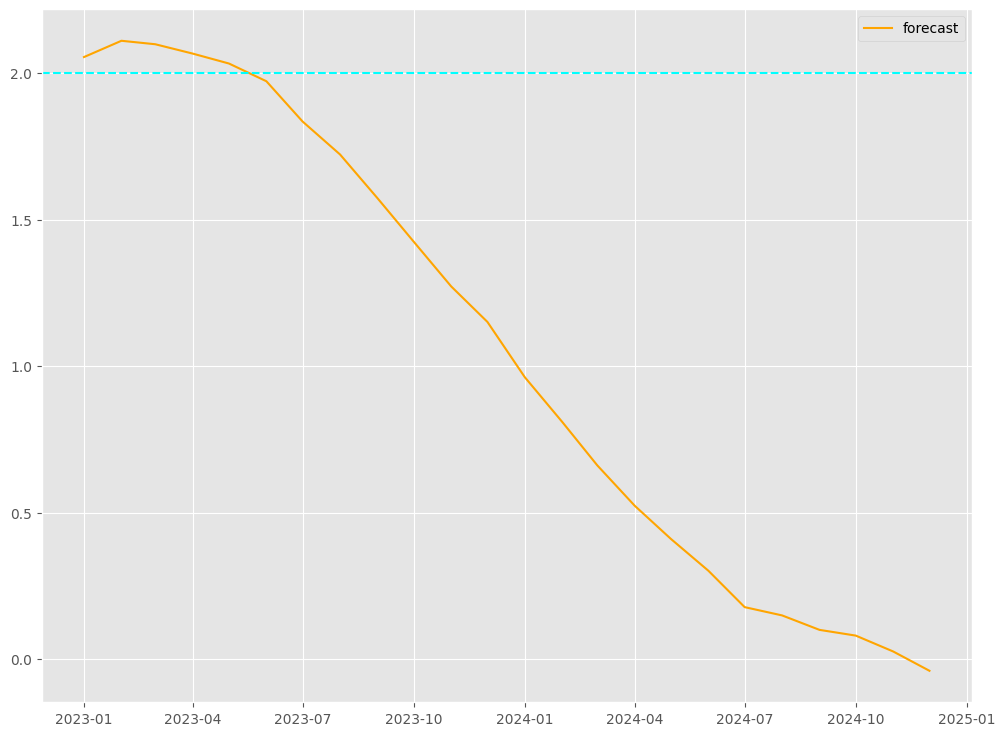

In [401]:
# showing the forecast value only 2023 to 2024
plt.plot(all_forecast.tail(24), color="orange", label="forecast")

plt.axhline(y=2, color="cyan", linestyle="--")
#plt.text(2, 2.2, "2", ha="center")

plt.legend()
plt.show()